# Analysis of open source contributors and impact of open source contribution on hiring and career satisfaction

Link to Blogpost: [How Contribution to Open Source Impacts Hiring and Career satisfaction?](https://medium.com/@oksana.p.koval/how-contribution-to-open-source-impacts-hiring-and-career-satisfaction-78ef38574a19)

# Business Context

Contribution to open source seems to be a rather prevalent practice in software development. In the following analysis we would like to assess how prevalen open source across different countries. We also want to check if
there is any difference in employment status of contributors to open source. We will also look into the question
whether contribution to open source can help land a new job and whether contribution to open source has any
impact on career satisfaction and a salary. 

## The goal of the analysis

is to answer the following questions:

    1. What share of developers is contributing to open source?
    2. What countries contribute to open source the most? Are there any overrepresented countries?
    3. What is the employment status of respondents? Are there any groups of employees that are overrepresented?
    4. Is contribution to open source important for hiring decision? Is there any bias among those that
    contribute to open source
    5. How open source contribution impacts salary and career satisfaction?

# Data Understanding

In the analysis we will use the StackOverflow Develop Survey from 2017. Stackoverflow survey is an annual survey about atittitudes, tools, and environments that are shaping the art and practice of software development.

In [273]:
# we start by importing necessary libraries for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read initial survey dataset

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
# let's have a brief look at the data
num_rows = df.shape[0] # the number of rows in the dataset
num_cols = df.shape[1] # the number of columns in the dataset
print(num_rows, num_cols)

19102 154


There are 19102 rows and 154 columns in the dataset in total

# Diving into the Survey

For the stated above questions we will first subset data based on the column ProgramHobby about contribution to open source.

The following questions (columns) will be used to answer the previously formulated questions:

    1. What share of developers is contributing to open source? - ProgramHobby *
    2. What countries contribute to open source the most? Are there any overrepresented countries? - Country *
    3. What is the employment status of respondents? Are there any groups of employees that 
    are overrepresented? - EmploymentStatus *
    4. Is contribution to open source important for hiring decision? Is there any bias among those 
    that contribute to open source? - ImportantHiringOpenSource *
    5. How open source contribution impacts salary and career satisfaction? CareerSatisfaction and Salary *


* Questions for the columns used in the analysis:
    
    
1. ProgramHobby - Do you program as a hobby or contribute to open source projects?
2. Country - In which country do you currently live?
3. EmploymentStatus - Which of the following best describes your current employment status?
4. ImportantHiringOpenSource - 
    Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational 
    high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your 
    disposal. They want to know what they should prioritize when recruiting software developers.
    How important should each of the following be in Globex's hiring process? 
    Contributions to open source projects
5. CareerSatisfaction - Career satisfaction rating
6. Salary - What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?

# Data Preparation

In [275]:
# subset only required columns for the analysis
columns = ['Respondent', 'ProgramHobby', 'Country', 'EmploymentStatus','ImportantHiringOpenSource', 'CareerSatisfaction', 'Salary']
df = df[columns]
df

,Respondent,ProgramHobby,Country,EmploymentStatus,ImportantHiringOpenSource,CareerSatisfaction,Salary
0,1,"Yes, both",United States,"Not employed, and not looking for work",Somewhat important,NaN,NaN
1,2,"Yes, both",United Kingdom,Employed part-time,Important,NaN,NaN
2,3,"Yes, both",United Kingdom,Employed full-time,NaN,8.0,113750.0
3,4,"Yes, both",United States,Employed full-time,Very important,6.0,NaN
4,5,"Yes, I program as a hobby",Switzerland,Employed full-time,NaN,6.0,NaN
...,...,...,...,...,...,...,...
19097,19098,"Yes, I program as a hobby",Canada,Employed full-time,Important,9.0,NaN
19098,19099,"Yes, I program as a hobby",India,"Not employed, and not looking for work",NaN,NaN,NaN
19099,19100,"Yes, I program as a hobby",United Kingdom,"Independent contractor, freelancer, or self-em...",Not very important,4.0,NaN
19100,19101,"Yes, I program as a hobby",United States,Employed full-time,Somewhat important,8.0,110000.0


In [276]:
# check types of columns
df.dtypes

Respondent                     int64
ProgramHobby                  object
Country                       object
EmploymentStatus              object
ImportantHiringOpenSource     object
CareerSatisfaction           float64
Salary                       float64
dtype: object

# Handling missing data

In [277]:
#checking for missing values
df.isnull().mean()

Respondent                   0.000000
ProgramHobby                 0.000000
Country                      0.000000
EmploymentStatus             0.000000
ImportantHiringOpenSource    0.431264
CareerSatisfaction           0.157052
Salary                       0.737776
dtype: float64

There are no missing values in the columns Respondent, ProgramHobby, Country and EmploymentStatus. Data from these columns can be analyzed without handling of missing data. For the columns ImportantHiringOpenSource, CareerSatisfaction and Salary there has to be a handling of missing data

## Handling missing data for ImportantHiringOpenSource

In [278]:
# print unique value for the columns to get a quick overview
df.ImportantHiringOpenSource.unique()

array(['Somewhat important', 'Important', nan, 'Very important',
       'Not at all important', 'Not very important'], dtype=object)

In [279]:
#let's get most frequent value for column ImportantHiringOpenSource
df.ImportantHiringOpenSource.value_counts()

Somewhat important      4075
Not very important      3352
Important               1989
Not at all important     950
Very important           498
Name: ImportantHiringOpenSource, dtype: int64

We could replace missing values with the most frequent response - somewhat important but this will introduce a certain bias in the data. In this case we would use a more simple method and replace NaN Values with "No response"

In [280]:
#replace NaNs in ImportantHiringOpenSource column with the "No Response" value 
df['ImportantHiringOpenSource'] = df['ImportantHiringOpenSource'].fillna("No response")

df.head()

,Respondent,ProgramHobby,Country,EmploymentStatus,ImportantHiringOpenSource,CareerSatisfaction,Salary
0,1,"Yes, both",United States,"Not employed, and not looking for work",Somewhat important,NaN,NaN
1,2,"Yes, both",United Kingdom,Employed part-time,Important,NaN,NaN
2,3,"Yes, both",United Kingdom,Employed full-time,No response,8.0,113750.0
3,4,"Yes, both",United States,Employed full-time,Very important,6.0,NaN
4,5,"Yes, I program as a hobby",Switzerland,Employed full-time,No response,6.0,NaN


## Handling missing data for Salary

In [281]:
# let's get a quick overview of the values in column salary
df.Salary[:20]

0          NaN
1          NaN
2     113750.0
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14    100000.0
15         NaN
16         NaN
17    130000.0
18     82500.0
19         NaN
Name: Salary, dtype: float64

Since salaries column has a wide range of values and quite a lot of missing values, we would replace NaN values with the mean of the column

In [282]:
# calculate mean for salary
df['Salary'].mean()

58341.39857056908

Mean value is 58341.39. We will use this information later to check if the mean value function works properly

In [283]:
# mean function
fill_mean = lambda col: col.fillna(col.mean())

In [284]:
# replace NaN values with mean for salary
df[['Salary']] = df[['Salary']].apply(fill_mean, axis=0)

df.head()

,Respondent,ProgramHobby,Country,EmploymentStatus,ImportantHiringOpenSource,CareerSatisfaction,Salary
0,1,"Yes, both",United States,"Not employed, and not looking for work",Somewhat important,NaN,58341.398571
1,2,"Yes, both",United Kingdom,Employed part-time,Important,NaN,58341.398571
2,3,"Yes, both",United Kingdom,Employed full-time,No response,8.0,113750.000000
3,4,"Yes, both",United States,Employed full-time,Very important,6.0,58341.398571
4,5,"Yes, I program as a hobby",Switzerland,Employed full-time,No response,6.0,58341.398571


Mean function works properly

## Handling missing values for CareerSatisfaction

In [285]:
df['CareerSatisfaction'].unique()

array([nan,  8.,  6.,  7.,  3.,  9.,  5., 10.,  4.,  0.,  2.,  1.])

Based on the unique value we can conclude that career satisfaction was measured on the scale from 0 to 10 and all value are whole numbers. In this case we will use mode to handle missing values

In [286]:
# calculate mode
df['CareerSatisfaction'].mode(dropna=False)

0    8.0
Name: CareerSatisfaction, dtype: float64

Mode for the column CareerSatisfaction is 8

In [287]:
# mode function
fill_mode = lambda col: col.fillna(col.mode()[0])

In [288]:
# replace NaN values with mode for career satisfaction
df[['CareerSatisfaction']] = df[['CareerSatisfaction']].apply(fill_mode, axis=0)

df.head()

,Respondent,ProgramHobby,Country,EmploymentStatus,ImportantHiringOpenSource,CareerSatisfaction,Salary
0,1,"Yes, both",United States,"Not employed, and not looking for work",Somewhat important,8.0,58341.398571
1,2,"Yes, both",United Kingdom,Employed part-time,Important,8.0,58341.398571
2,3,"Yes, both",United Kingdom,Employed full-time,No response,8.0,113750.000000
3,4,"Yes, both",United States,Employed full-time,Very important,6.0,58341.398571
4,5,"Yes, I program as a hobby",Switzerland,Employed full-time,No response,6.0,58341.398571


The function for mode value also works properly. 

## Creating dataframes for open source and not open source respondents

In [289]:
# get unique values in column ProgramHobby
print(df.ProgramHobby.unique())

['Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects']


Output values 'Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects'


In [290]:
# create a function to subset contributors to open source and those that do not subset to open source

def open_source(program_hobby_str):
    '''
    INPUT
        program_hobby_str - a string of one of the values from the Program Hobby column
    
    OUTPUT
        return 1 if the string is  in ('Yes, I contribute to open source projects', 'Yes, both')
        return 0 otherwise
    
    '''
    if program_hobby_str in ("Yes, I contribute to open source projects", "Yes, both"):
        return 1
    else:
        return 0
    

df['ProgramHobby'].apply(open_source)[:5]

0    1
1    1
2    1
3    1
4    0
Name: ProgramHobby, dtype: int64

In [291]:
# replace values with 0 and 1
df['ProgramHobby'] = df['ProgramHobby'].apply(open_source)
df.head()

,Respondent,ProgramHobby,Country,EmploymentStatus,ImportantHiringOpenSource,CareerSatisfaction,Salary
0,1,1,United States,"Not employed, and not looking for work",Somewhat important,8.0,58341.398571
1,2,1,United Kingdom,Employed part-time,Important,8.0,58341.398571
2,3,1,United Kingdom,Employed full-time,No response,8.0,113750.000000
3,4,1,United States,Employed full-time,Very important,6.0,58341.398571
4,5,0,Switzerland,Employed full-time,No response,6.0,58341.398571


In [293]:
# create dataframes with the users that contribute to open source and do not contribute to open source

df_OpSr = df[df['ProgramHobby'] == 1] #open source contributors
df_not_OpSr = df[df['ProgramHobby'] == 0] #not open source contributors
# df_OpSr.head()
# df_not_OpSr.head()


In [294]:
num_rows_OpSr = df_OpSr.shape[0] # the number of rows in the open source dataset
num_rows_not_OpSr = df_not_OpSr.shape[0] # the number of columns in the not open source dataset
print("open source dataset (rows):", num_rows_OpSr,";", "not open source dataset (rows):", num_rows_not_OpSr)

open source dataset (rows): 6181 ; not open source dataset (rows): 12921


There are 6181 rows in open source dataset and 12921 rows in not open source dataset

Now that we have a prepared dataset we can continue with the analysis

# Analysis

## 1. What share of developers is contributing to open source?

In [295]:
# share of respondents that contribute to open source 
num_rows_all = df.shape[0]
num_rows_df_OpSr = df_OpSr.shape[0]
share_OpSr = f"{(num_rows_df_OpSr/num_rows_all):.0%}"
print(num_rows_all, num_rows_df_OpSr, share_OpSr)

19102 6181 32%


Share of users contributing to open source is 32% across all respondents

## 2. What countries contribute to open source the most? Are there any overrepresented countries?

                    countries: open source  countries: all
United States                     0.226986        0.228458
India                             0.094321        0.081510
Germany                           0.076525        0.069993
United Kingdom                    0.065685        0.074547
Canada                            0.036725        0.045754
Poland                            0.032357        0.036331
France                            0.029769        0.027327
Netherlands                       0.023944        0.019527
Australia                         0.021356        0.020888
Russian Federation                0.019253        0.017276
Italy                             0.017958        0.015915
Israel                            0.017311        0.017694
Switzerland                       0.015693        0.012669
Spain                             0.015370        0.016333
Brazil                            0.014723        0.013559


<AxesSubplot:>

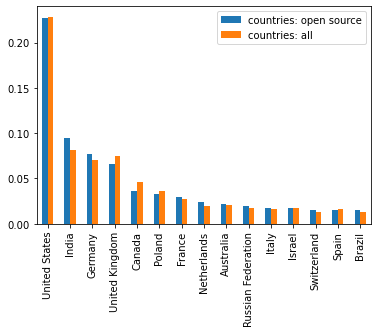

In [296]:
# share of respondents that contribute to open source per country
df_OpSr_country = df_OpSr.Country.value_counts(normalize=True)
df_country = df.Country.value_counts(normalize=True)
df_country_share = pd.concat([df_OpSr_country, df_country], axis = 1)
df_country_share.columns = ['countries: open source', 'countries: all']
print(df_country_share.head(15))

df_country_share.head(15).plot(kind = "bar")

Countries that contribute the most to open source: United States, India, Germany, United Kingdom, Canada
Overrepresented countries: India, Germany, France, Netherlands, Australia, Russian Federation, Italy, Israel, Switzerland

## 3. What is the employment status of respondents? Are there any groups of employees that are overrepresented? 

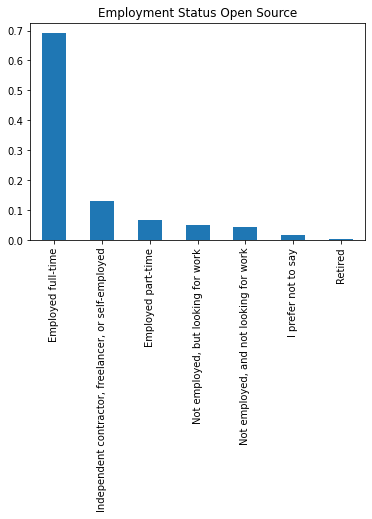

In [297]:
#3. Employment status of open source contributors
emp_vals_OpSr = df_OpSr.EmploymentStatus.value_counts()

(emp_vals_OpSr/df_OpSr.shape[0]).plot(kind="bar");
plt.title("Employment Status Open Source");

The majority of respondents are employed full time

In [298]:
# comparison of employments status for all respondents and theose contributing to open source
df_OpSr_emp = df_OpSr.EmploymentStatus.value_counts(normalize=True)
df_emp = df.EmploymentStatus.value_counts(normalize=True)
df_emp_share = pd.concat([df_OpSr_emp, df_emp], axis = 1)
df_emp_share.columns = ['employment: open source', 'employment: all']
print(df_emp_share)

                                                    employment: open source  \
Employed full-time                                                 0.691797   
Independent contractor, freelancer, or self-emp...                 0.129429   
Employed part-time                                                 0.066979   
Not employed, but looking for work                                 0.049183   
Not employed, and not looking for work                             0.042712   
I prefer not to say                                                0.016664   
Retired                                                            0.003236   

                                                    employment: all  
Employed full-time                                         0.714847  
Independent contractor, freelancer, or self-emp...         0.097686  
Employed part-time                                         0.061145  
Not employed, but looking for work                         0.047430  
Not employed, and

Independent contractors, Part-Time Employees and those actively looking for a job are slightly overrepresented in the open source set

## 4. Is contribution to open source important for hiring decision? Is there any bias among those that contribute to open source?

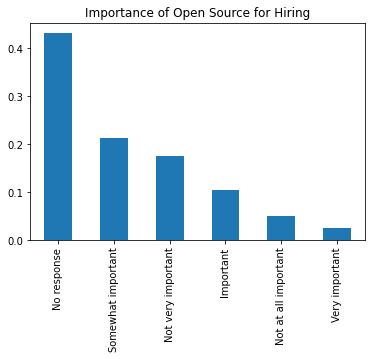

In [299]:
#4.How important is Open Source for hiring?
hiring_vals = df.ImportantHiringOpenSource.value_counts()

(hiring_vals/df.shape[0]).plot(kind="bar");
plt.title("Importance of Open Source for Hiring");

The majority of respondents have not provided any response. Based on the provided data looks like the majority of respondents consider open source contribution as somewhat important for hiring decision.

                      hiring: open source  hiring: not open source
No response                      0.414981                 0.439053
Somewhat important               0.238796                 0.201145
Important                        0.155962                 0.079328
Not very important               0.120369                 0.201842
Very important                   0.048212                 0.015479
Not at all important             0.021679                 0.063153


<AxesSubplot:>

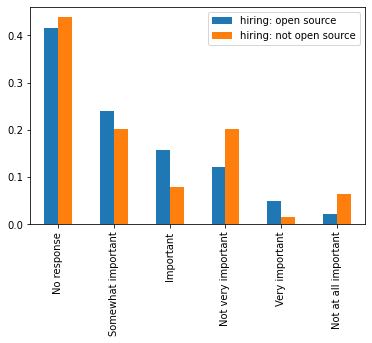

In [300]:
# Bias: comparing importance of those that contribute and do not contribute
df_OpSr_hiring = df_OpSr.ImportantHiringOpenSource.value_counts(normalize=True)
df_hiring_not_OpSr = df_not_OpSr.ImportantHiringOpenSource.value_counts(normalize=True)
df_hiring_share_OSvsnotOS = pd.concat([df_OpSr_hiring, df_hiring_not_OpSr], axis = 1)
df_hiring_share_OSvsnotOS.columns = ['hiring: open source', 'hiring: not open source']
print(df_hiring_share_OSvsnotOS)
df_hiring_share_OSvsnotOS.plot(kind = "bar")

There is definitely a bias to observe. The respondents that contribute to open source view contribution to open source as a much more important factor for hiring than those that do not.

## 5. How open source contribution impacts salary and career satisfaction?

In [301]:
#4. How Open Source contribution impacts salary and career satisfaction?

# impact of Open Source on Career satisfaction
OpSr_carSat = df_OpSr['CareerSatisfaction'].dropna().mean()
not_OpSr_carSat = df_not_OpSr['CareerSatisfaction'].dropna().mean()
print("career satisfaction for open source: ", OpSr_carSat, ";", 
      "career satisfaction for not open source: ", not_OpSr_carSat)


career satisfaction for open source:  7.6049182980100305 ; career satisfaction for not open source:  7.371410881510719


In [302]:
# impact of Open Source on salary
OpSr_salary = df_OpSr['Salary'].mean()
not_OpSr_salary = df_not_OpSr['Salary'].mean()
print("salary for open source: ", OpSr_salary, ";", 
      "salary for not open source: ", not_OpSr_salary,";",
      "difference: ",(OpSr_salary - not_OpSr_salary))

salary for open source:  59529.44662944826 ; salary for not open source:  57773.07374649271 ; difference:  1756.3728829555548


The mean career satisfaction for those that contribute to open source is higher than those that do not contribute to open source (7.61 vs. 7.37 respectively). There is also impact on salary to observe: the salary of those contributing to open source is almost 2 thousands higher when compared to those that do not contribute to open source.

# Conclusion

The focus of study was to analyze where the most open source contributors come from and what is ther employment status. As a next step, we looked into importance of open source contribution for hiring process as well as into possible impact of open source contribution on salary and career satisfaction. It was identified that around one third of all respondents contribute to open source. The majority of the respondents come from the United Stated, India and Germany. The majority of open source contributors work full-time but contribution to open source is more prevalent among part-time employees and contractors. It is important to note that open source contributors are highly biased when it comes to hiring: they view contribution as a very important factor for a hiring decision whereas for the majority of the respondents it is only somewhat important. Even though contribution to open source may not have a major impact on hiring decision, it has an impact on career and salary satisfaction: those that contribute to open source tend to be more satisfied with their career and to earn more.